# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [3]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
df = pd.read_csv('/Users/criiiss/ironhack/notebook/labs/lab-unsupervised-learning-es/data/Wholesale.csv')
df = pd.DataFrame(df)


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB

Primeras filas del Dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4

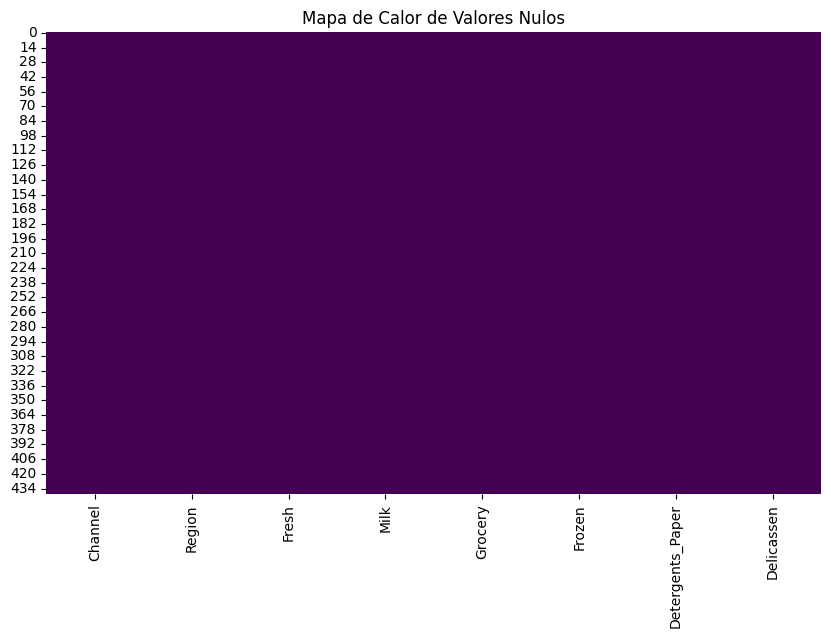

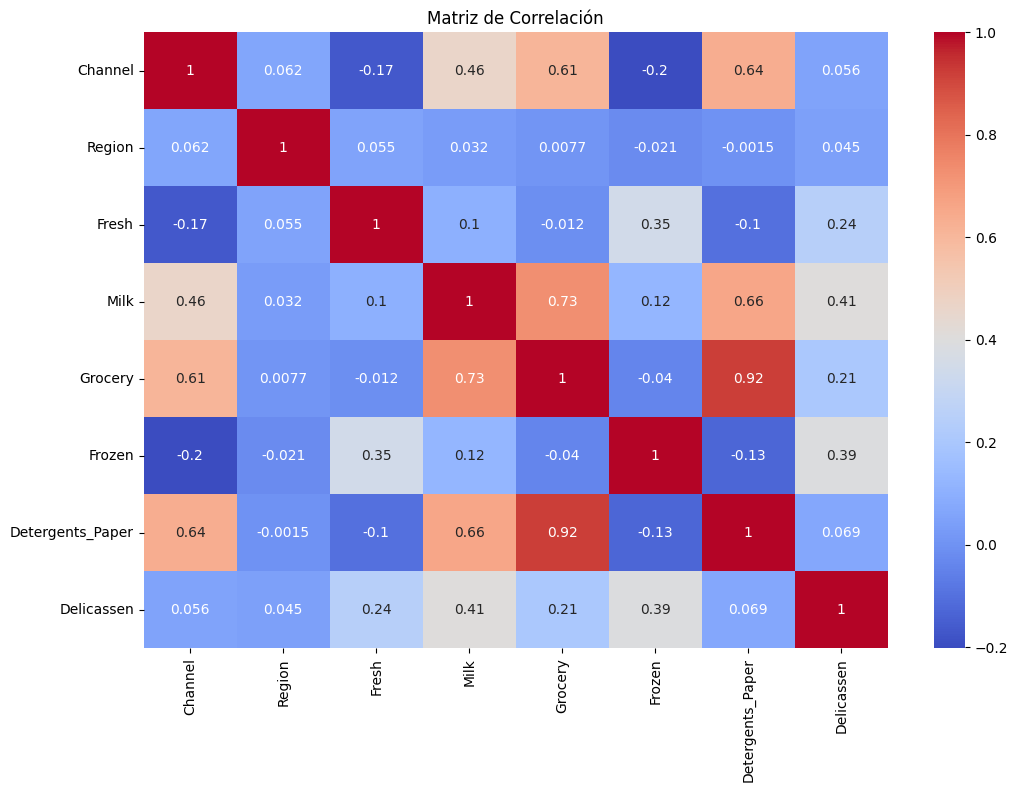

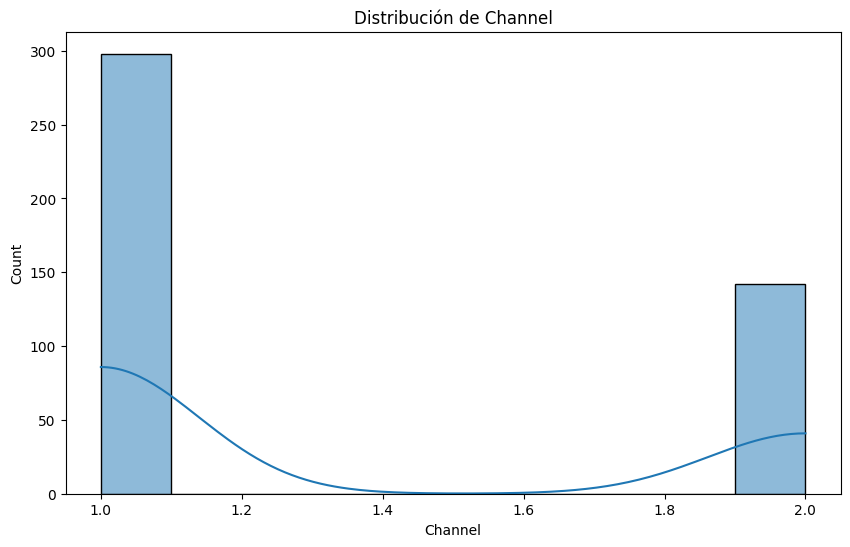

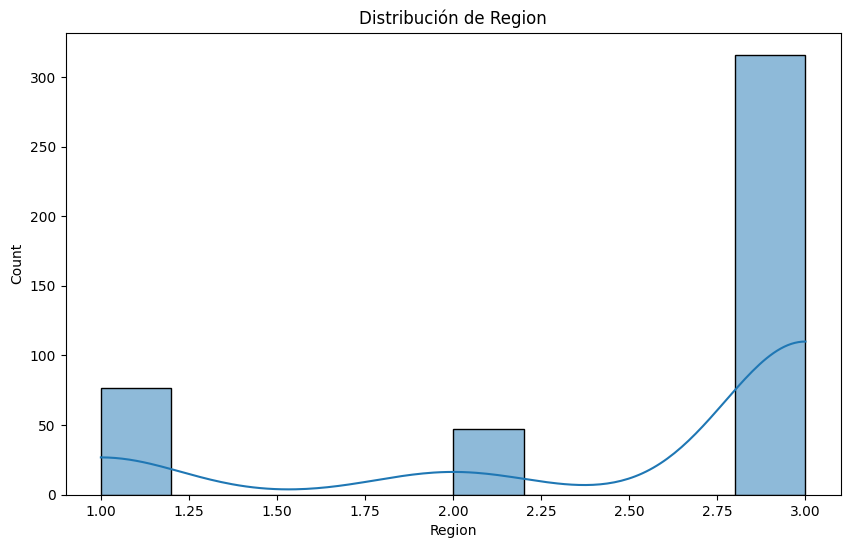

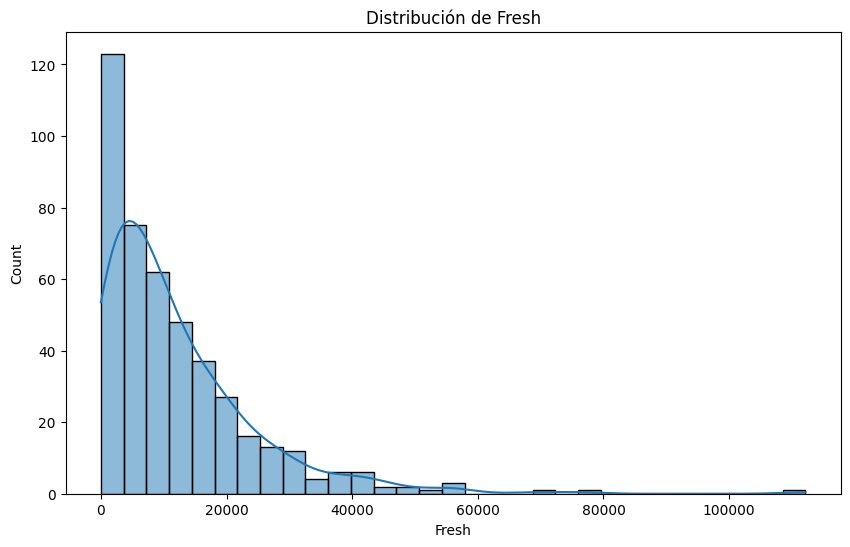

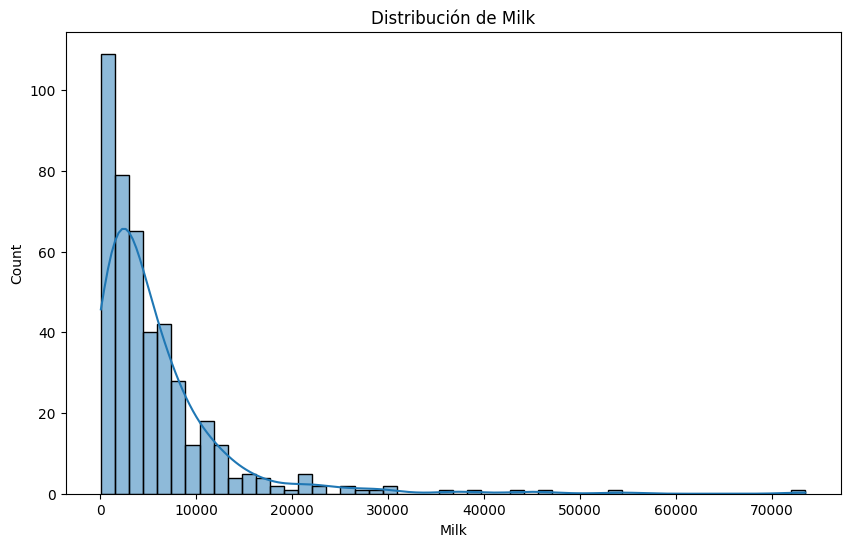

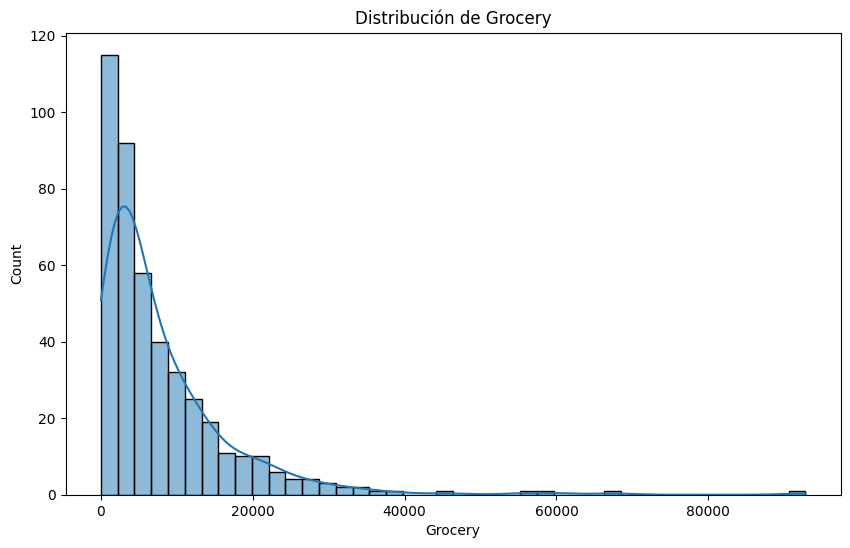

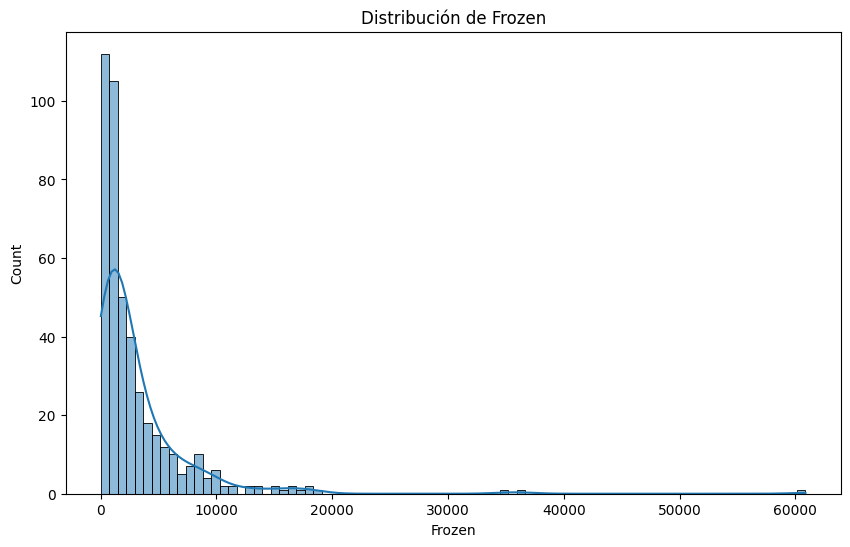

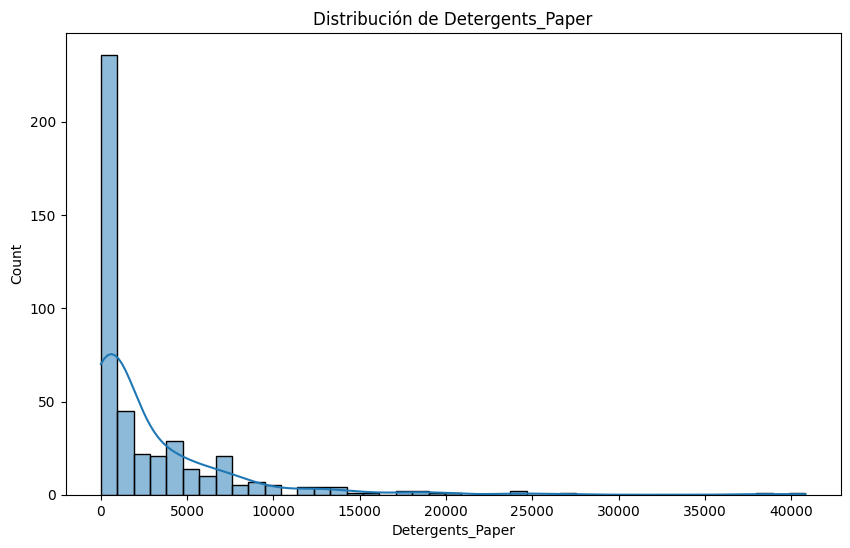

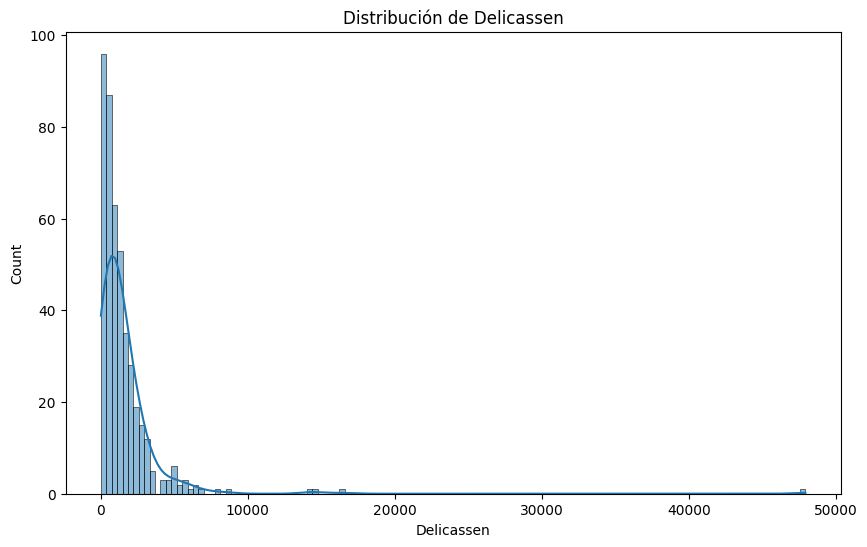

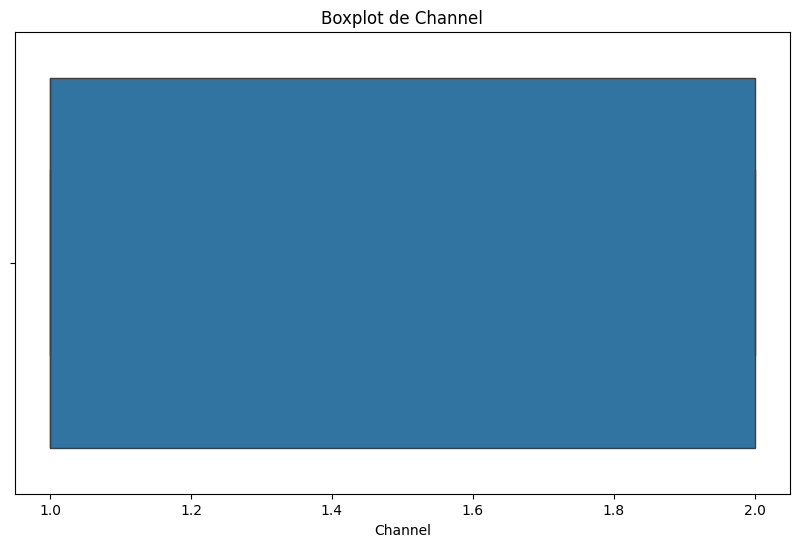

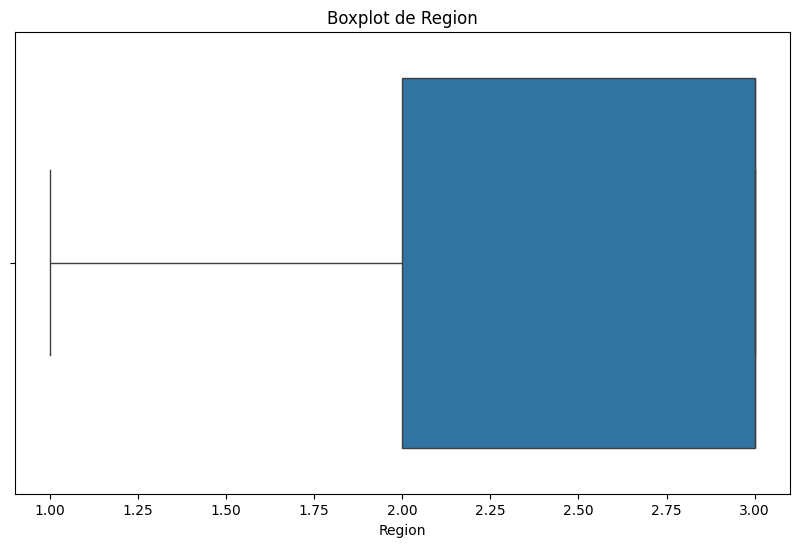

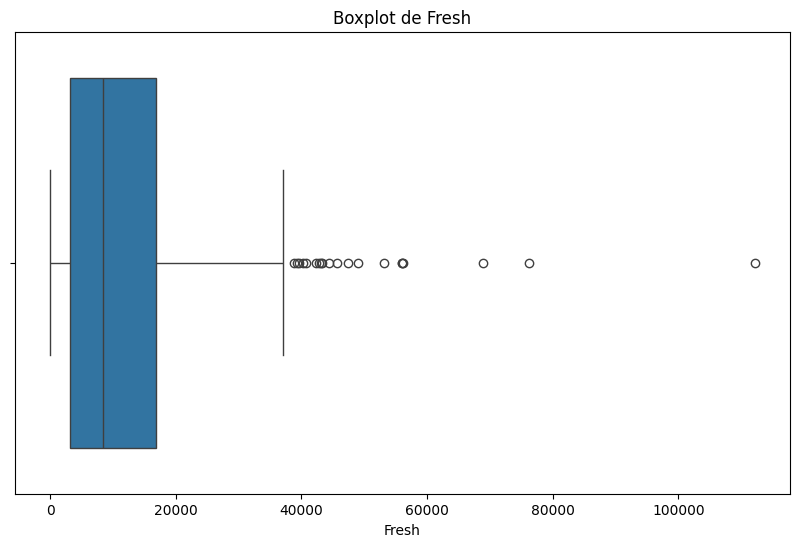

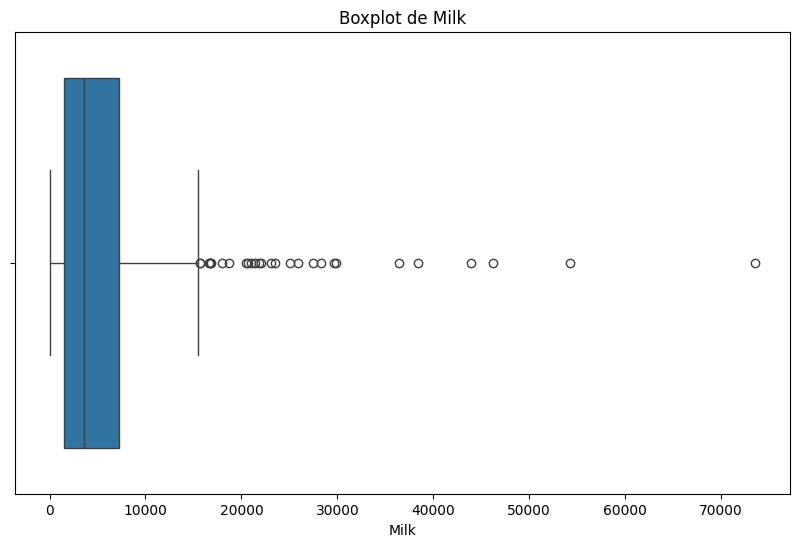

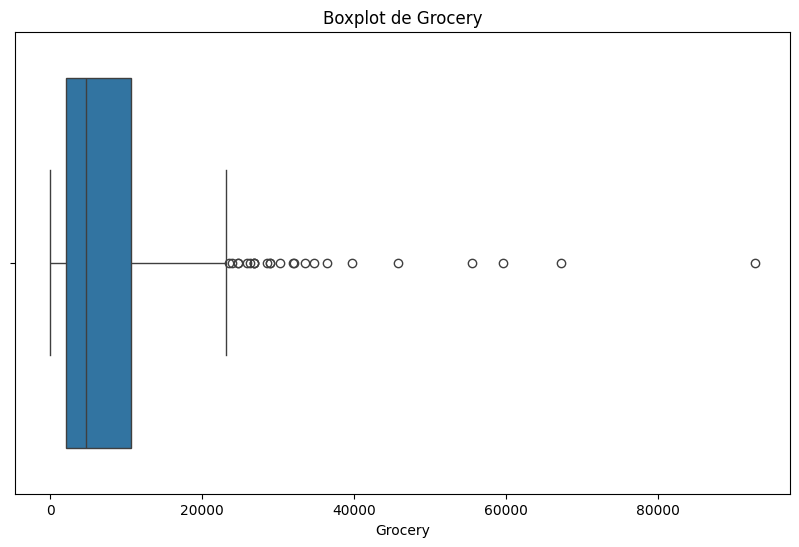

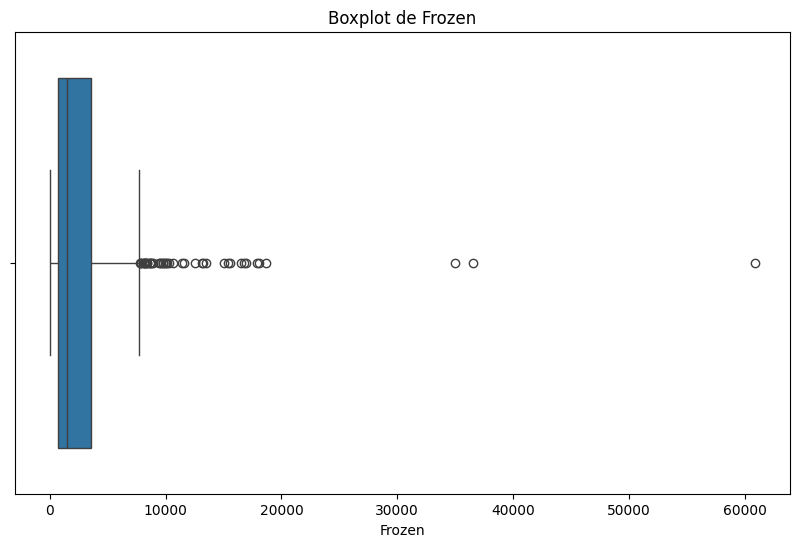

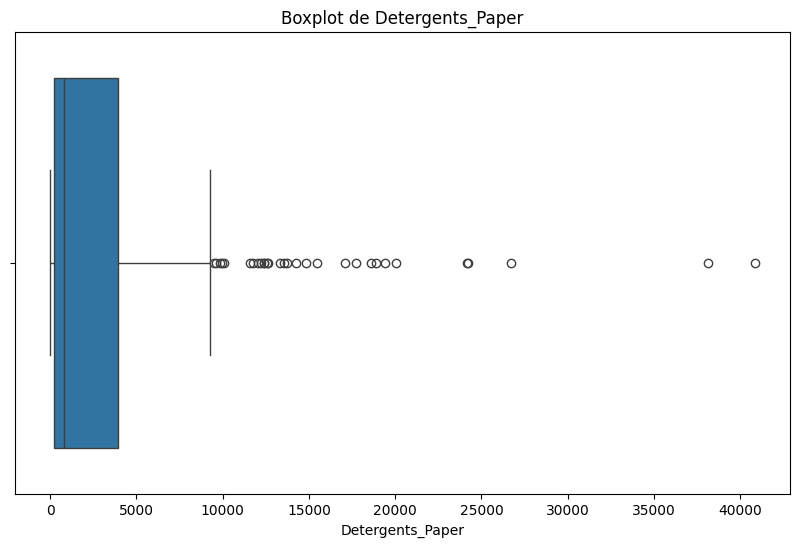

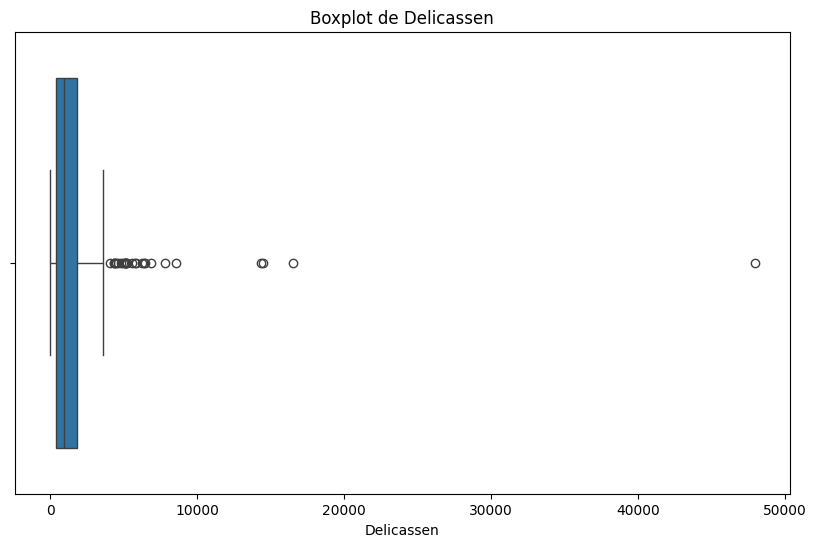

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (en este ejemplo, se asume que df ya está cargado en el entorno)
# df = pd.read_csv('path_to_your_dataset.csv')  # Descomenta y ajusta si necesitas cargar el archivo

# 1. Información básica y estructura del dataset
print("Información del Dataset:")
df.info()

print("\nPrimeras filas del Dataset:")
print(df.head())

# 2. Descripción estadística
print("\nDescripción Estadística:")
print(df.describe())

# 3. Identificación de datos categóricos
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\nColumnas Categóricas:")
print(categorical_columns)

# 4. Conteo de valores nulos
print("\nConteo de Valores Nulos:")
print(df.isnull().sum())

# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Nulos")
plt.show()

# 5. Colinealidad de columnas (matriz de correlación)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# 6. Distribución de los datos por columnas
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f"Distribución de {column}")
        plt.show()

# 7. Boxplot para detectar valores atípicos
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot de {column}")
        plt.show()





**Tus observaciones aquí**

+ El diagrama de caja muestra que todas las categorías tienen valores atípicos extremos, especialmente en las categorías de Fresh, Milk, Grocery, y Delicassen. Esto indica una distribución sesgada, con muchos valores muy altos en comparación con la mayoría de los datos.






# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

**Tus observaciones aquí**

+ Parece que...Despues de analizar los datos he visto que no se presentant muchos datos nulos por este motivo creo que no es necesario realitzar una limpieza, pero si hay mucha dispersión.


# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [6]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# Supongamos que `customers` es tu DataFrame con los datos a escalar
customers = df

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
customers_scale = scaler.fit_transform(customers)

# `customers_scale` ahora contiene los datos escalados



# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [11]:
from sklearn.cluster import KMeans

# Establecemos `customers`  con los datos originales
# y `customers_scale` es el array con los datos escalados

# Número de clusters
n_clusters = 2

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(customers_scale)

# Asignar las etiquetas de cluster a una nueva columna en el DataFrame original
customers['labels'] = kmeans.labels_



### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [8]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

Cuenta los valores en `labels`.

In [12]:
# Your code here:
# Contar los valores en la columna 'labels'
label_counts = customers['labels'].value_counts()

# Mostrar los resultados
print(label_counts)

#El resultado muestra el numero de registros asignados a cada cluster


labels
1    300
0    140
Name: count, dtype: int64


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [13]:
from sklearn.cluster import DBSCAN

# Inicializar el modelo DBSCAN con un valor de eps
dbscan = DBSCAN(eps=0.5)

# Ajustar el modelo a los datos escalados
dbscan.fit(customers_scale)

# Asignar las etiquetas de cluster a una nueva columna en el DataFrame original
customers['labels_DBSCAN'] = dbscan.labels_



Cuenta los valores en `labels_DBSCAN`.

In [14]:
# Contar los valores en la columna 'labels_DBSCAN'
label_counts_dbscan = customers['labels_DBSCAN'].value_counts()

# Mostrar los resultados
print(label_counts_dbscan)


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [15]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:
 import matplotlib.pyplot as plt

# Crear una figura con 1x2 subgráficos para comparar K-Means y DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grocery vs Fresh con etiquetas K-Means
axes[0].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], cmap='viridis')
axes[0].set_title('K-Means: Grocery vs Fresh')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# Grocery vs Fresh con etiquetas DBSCAN
axes[1].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis')
axes[1].set_title('DBSCAN: Grocery vs Fresh')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:
import matplotlib.pyplot as plt

# Crear una figura con 1x2 subgráficos para comparar K-Means y DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grocery vs Fresh con etiquetas K-Means
axes[0].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], cmap='viridis')
axes[0].set_title('K-Means: Grocery vs Fresh')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# Grocery vs Fresh con etiquetas DBSCAN
axes[1].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis')
axes[1].set_title('DBSCAN: Grocery vs Fresh')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [ ]:
# Your code here:
import pandas as pd

# Assuming 'customers' is your DataFrame with 'labels' and 'labels_DBSCAN'

# Agrupar por labels de K-Means y calcular la media
grouped_kmeans = customers.groupby('labels').mean()

# Agrupar por labels de DBSCAN y calcular la media
grouped_dbscan = customers.groupby('labels_DBSCAN').mean()

print("Media por grupos de K-Means:")
print(grouped_kmeans)
print("\nMedia por grupos de DBSCAN:")
print(grouped_dbscan)


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
